In [1]:
%pip install tweepy



   ---------------------------------------- 0.0/99.4 kB ? eta -:--:--
   ------------------------------------- -- 92.2/99.4 kB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 99.4/99.4 kB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/151.7 kB ? eta -:--:--
   ---------------------------------------- 151.7/151.7 kB 8.8 MB/s eta 0:00:00


In [4]:
%pip install snscrape pandas


   ---------------------------------------- 0.0/74.8 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/74.8 kB ? eta -:--:--
   ---------------- ----------------------- 30.7/74.8 kB 445.2 kB/s eta 0:00:01
   ---------------------------------------- 74.8/74.8 kB 694.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip uninstall snscrape -y




Found existing installation: snscrape 0.7.0.20230622
Uninstalling snscrape-0.7.0.20230622:
  Successfully uninstalled snscrape-0.7.0.20230622
Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install snscrape --force-reinstall

  Using cached snscrape-0.7.0.20230622-py3-none-any.whl.metadata (4.9 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached lxml-5.3.1-cp312-cp312-win_amd64.whl.metadata (3.8 kB)
  Using cached beautifulsoup4-4.13.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached filelock-3.17.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached soupsieve-2.6-py3-none-any.whl.metadata (4.6 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached charset_normalizer-3.4.1-cp312-cp312-win_amd64.whl.metadata (36 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.1.31-py3-none-any.whl.metadata (2.5 kB)
  Using cached PySocks-1.7.1-py3-none-any.whl.metadata (13 kB)
Using cached snscrape-0.7.0.20230622-py3-none-any.whl (74 kB)
Using cached beautifulsoup4-4.13.3-py3-none-any.whl (186 kB)
Using cached filelock-3.17.0-py3-none-any.whl (16 kB)

In [2]:
%pip install --no-cache-dir snscrape


Note: you may need to restart the kernel to use updated packages.


In [3]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# AI-related stock tickers & keywords
stocks = ["NVDA", "MSFT", "GOOGL", "AMD", "AAPL", "META", "TSLA"]
keywords = ["AI stock", "ChatGPT stocks", "Nvidia AI", "Tesla AI", "AI investing"]

# Define date range (past 1 year)
start_date = "2024-02-25"
end_date = "2025-02-24"

# Build search query (e.g., "NVDA OR MSFT AI stock since:2024-02-25 until:2025-02-24")
query = f"({' OR '.join(stocks + keywords)}) since:{start_date} until:{end_date} -filter:retweets"

# Fetch tweets
tweets = []
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    tweets.append([tweet.date, tweet.user.username, tweet.content])

    # Stop after collecting 5000 tweets (adjustable)
    if len(tweets) >= 5000:
        break

# Convert to DataFrame
df = pd.DataFrame(tweets, columns=["Timestamp", "User", "Tweet"])

# Save to CSV
df.to_csv("snscrape_ai_stock_discussions.csv", index=False)

# Display first few rows
print(df.head())


AttributeError: 'FileFinder' object has no attribute 'find_module'

In [3]:
import tweepy
import pandas as pd
import datetime

# 🔹 Replace with your Twitter API credentials
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAKT6zQEAAAAACyxyilwmd1DP7%2FMCnYFlBcwfcE4%3DLRgaO8RVjrAJ5nbLoXY3CxhpCkdfCw9DYroGfrgYsRHABojpZy"

# Authenticate with Twitter API
client = tweepy.Client(bearer_token=BEARER_TOKEN)

# AI-related stock tickers & keywords
stocks = ["NVDA", "MSFT", "GOOGL", "AMD", "AAPL", "META", "TSLA"]
keywords = ["AI stock", "ChatGPT stocks", "Nvidia AI", "Tesla AI", "AI investing"]

# Define date range (past year)
start_date = "2024-02-25T00:00:00Z"
end_date = "2025-02-24T00:00:00Z"

# Query format: "NVDA OR MSFT OR AI stock OR ChatGPT stocks"
query = " OR ".join(stocks + keywords) + " -is:retweet"  # Exclude retweets

# Fetch tweets
tweets_data = []
for tweet in tweepy.Paginator(client.search_recent_tweets, 
                              query=query, 
                              start_time=start_date, 
                              end_time=end_date,
                              max_results=100,  # Fetch 100 tweets per request
                              tweet_fields=["created_at", "text", "author_id"]).flatten(limit=1000):  # Limit total results

    tweets_data.append([tweet.created_at, tweet.author_id, tweet.text])

# Convert to DataFrame
df = pd.DataFrame(tweets_data, columns=["Timestamp", "User", "Tweet"])

# Save to CSV
df.to_csv("twitter_ai_stock_discussions.csv", index=False)

# Display first few rows
df.head()


TooManyRequests: 429 Too Many Requests
Too Many Requests

In [ ]:

# Pushshift API URL for searching posts
PUSHSHIFT_URL = "https://api.pushshift.io/reddit/search/submission/"

def fetch_historical_reddit_posts():
    comment_data = []
    
    for subreddit in subreddits:
        params = {
            "subreddit": subreddit,
            "after": start_date,
            "before": end_date,
            "size": 500,  # Max posts per request (increase as needed)
            "sort": "desc"
        }
        
        try:
            response = requests.get(PUSHSHIFT_URL, params=params)
            data = response.json().get("data", [])
            
            for submission in data:
                created_utc = submission["created_utc"]
                text = submission.get("selftext", "")  # Post content
                title = submission.get("title", "")

                # If title or body contains AI-related keywords, add to dataset
                if any(keyword.lower() in (title + text).lower() for keyword in ai_keywords):
                    comment_data.append([
                        datetime.datetime.fromtimestamp(created_utc),
                        subreddit,
                        submission.get("author", "Unknown"),
                        title + " " + text
                    ])
        
        except Exception as e:
            print(f"Error fetching data from {subreddit}: {str(e)}")

    # Convert to DataFrame
    df = pd.DataFrame(comment_data, columns=["Timestamp", "Subreddit", "Username", "Comment"])
    return df

In [14]:
import pandas as pd

# Load the dataset
file_path = "SecondMerge.csv"
df = pd.read_csv(file_path)

# Assuming the daily return column is named "DailyReturn" (change it if needed)
return_col = "Daily_Return"

# Ensure the column exists
if return_col in df.columns:
    df["Direction"] = df[return_col].apply(lambda x: "Up" if x > 0 else "Down")

    # Save the updated file
    updated_file_path = "SecondMerge_Updated.csv"
    df.to_csv(updated_file_path, index=False)
    print(f"Updated file saved as: {updated_file_path}")
else:
    print(f"Column '{return_col}' not found in the dataset. Check column names:", df.columns)


Updated file saved as: SecondMerge_Updated.csv


C:\Users\vasistha\AppData\Local\Temp\ipykernel_17708\2703307216.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


Model Accuracy: 0.54
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.08      0.14      1230
           1       0.53      0.95      0.68      1370

    accuracy                           0.54      2600
   macro avg       0.56      0.51      0.41      2600
weighted avg       0.56      0.54      0.42      2600

Confusion Matrix:
 [[  94 1136]
 [  66 1304]]


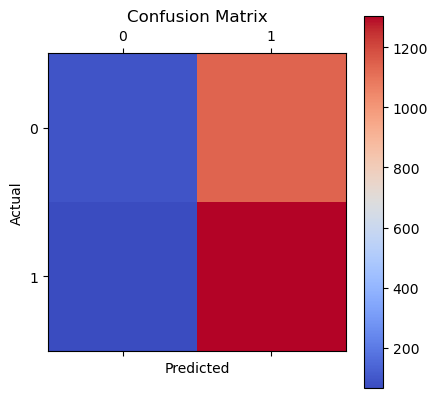

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("SecondMerge_Updated.csv")

# Convert Timestamp to Date
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Date"] = df["Date"].dt.date

# Target variable: Stock direction (1 = Up, 0 = Down)
df["Direction"] = (df["Daily_Return"] > 0).astype(int)

# Selecting relevant features
features = ["Total Comments", "Positive Comments", "Negative Comments", "Neutral Comments","Close","Volume"]
#features = ["Total Comments","Open","High","Low","Close","Volume"]
X = df[features]
y = df["Direction"]

# Handling missing values
X.fillna(0, inplace=True)

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot Confusion Matrix
plt.matshow(confusion_matrix(y_test, y_pred), cmap="coolwarm")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


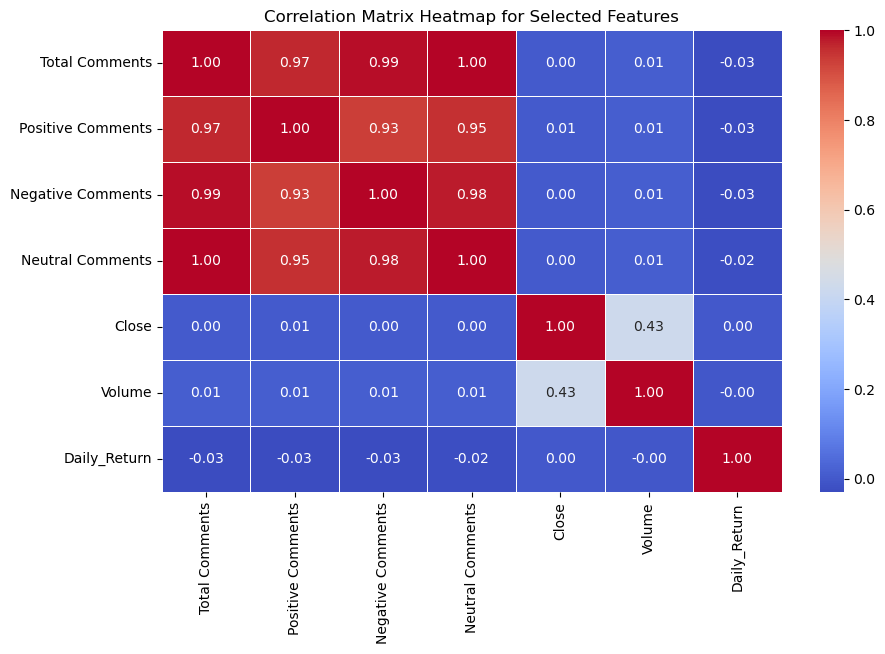

In [16]:
import seaborn as sns

# Define the features for correlation analysis
features = ["Total Comments", "Positive Comments", "Negative Comments", "Neutral Comments","Close","Volume","Daily_Return"]
#features = ["Total Comments","Open","High","Low","Close","Volume","Daily_Return"]

# Compute the correlation matrix for the selected features
correlation_matrix = df[features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap for Selected Features")
plt.show()


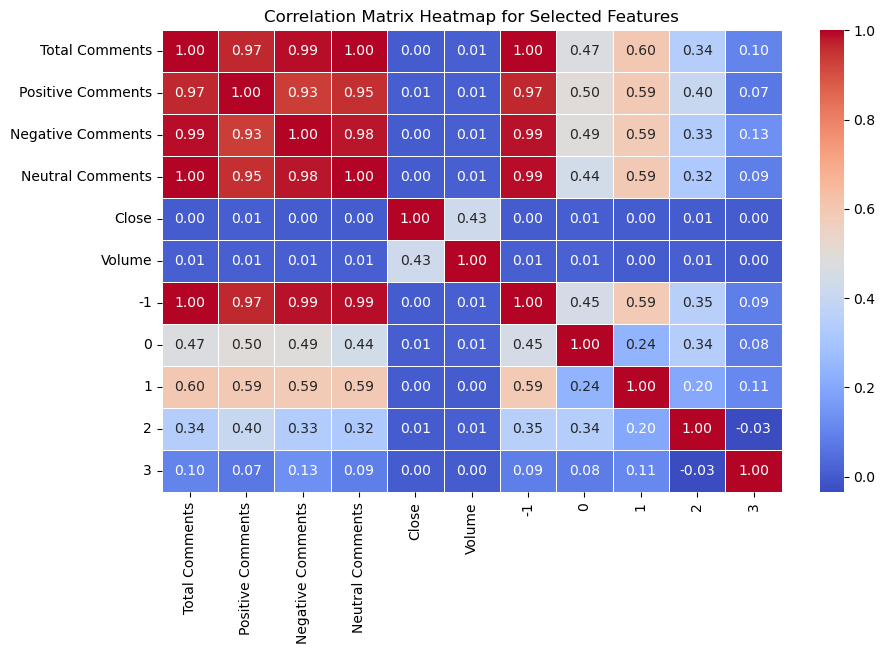

In [25]:
df = pd.read_csv("merged_stock_topic_data.csv")

import seaborn as sns

# Define the features for correlation analysis
#features = ["Total Comments", "Positive Comments", "Negative Comments", "Neutral Comments","Close","Volume","Daily_Return","-1","0","1","2","3"]
#features = ["Total Comments","Open","High","Low","Close","Volume","Daily_Return"]
features = ["Total Comments", "Positive Comments", "Negative Comments", "Neutral Comments", "Close", "Volume","-1","0","1","2","3"]

# Compute the correlation matrix for the selected features
correlation_matrix = df[features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap for Selected Features")
plt.show()

C:\Users\vasistha\AppData\Local\Temp\ipykernel_17708\2144492605.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


Model Accuracy: 0.54
Classification Report:
               precision    recall  f1-score   support

        Down       0.55      0.12      0.20      1230
          Up       0.54      0.91      0.68      1370

    accuracy                           0.54      2600
   macro avg       0.54      0.52      0.44      2600
weighted avg       0.54      0.54      0.45      2600

Confusion Matrix:
 [[ 151 1079]
 [ 122 1248]]


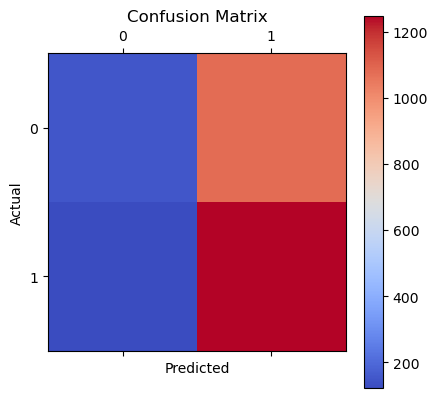

In [26]:
X = df[features]
y = df["Direction"]

# Handling missing values
X.fillna(0, inplace=True)

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot Confusion Matrix
plt.matshow(confusion_matrix(y_test, y_pred), cmap="coolwarm")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [27]:
print(y_pred)

['Up' 'Up' 'Up' ... 'Up' 'Up' 'Up']


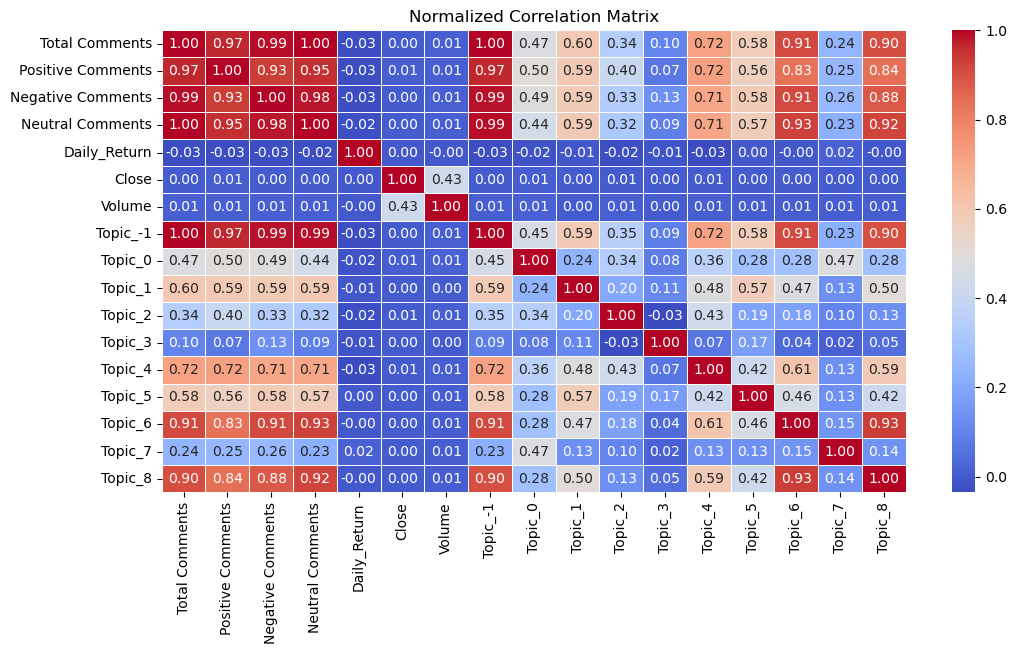

In [32]:
from sklearn.preprocessing import MinMaxScaler


# Load the merged dataset
df = pd.read_csv("merged_stock_topic_data.csv")

# Define the columns to normalize
columns_to_normalize = ["Total Comments", "Positive Comments", "Negative Comments", "Neutral Comments", "Daily_Return",
                        "Close", "Volume"] + list(df.columns[df.columns.str.startswith("Topic_")])  # Include all topic frequency columns

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Compute correlation matrix again
correlation_matrix = df[columns_to_normalize].corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Normalized Correlation Matrix")
plt.show()